In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [52]:
df=pd.read_csv('T:/python/class/class_21/titanic_data.csv')

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.select_dtypes(exclude='object').isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# Taking Numeric column only for replacing null values

1.Mean,Median,Mode
2.Random Sample Imputation

# 1.Mean,Median,Mode

In [55]:
# Mean for numeric dataset
mean_value = df['Age'].mean()

In [56]:
mean_value

29.69911764705882

In [57]:
# Taking only integer value
mean_value =int( df['Age'].mean())
mean_value

29

In [58]:
median_value =int( df['Age'].median())
median_value


28

In [59]:
mode_value =int( df['Age'].mode())
mode_value


24

In [60]:
#function to call mean,median,mode
def replacement(df,var,value,mean):
    df[var+mean+'_replaced']= df['Age'].fillna(value)

In [61]:
replacement(df,'Age',mean_value,'_mean')

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [63]:
df['Age_mean_replaced'].isnull().sum()

0

In [64]:
replacement(df,'Age',median_value,'_median')

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [66]:
df['Age_median_replaced'].isnull().sum()

0

In [67]:
replacement(df,'Age',mode_value,'_mode')

In [68]:
df['Age_mode_replaced'].isnull().sum()

0

# using Statistcis Graph to visulaize the data

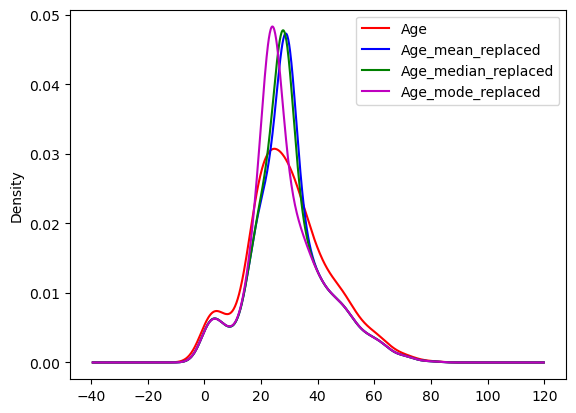

In [69]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age')
df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_mean_replaced')
df['Age_median_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_median_replaced')
df['Age_mode_replaced'].plot(kind='kde',ax=ax,color='m',legend='Age_mode_replaced')
plt.legend(loc=1)
plt.show()

# 2.Random Sample Imputation

In [70]:
# step1: copy the orginal data age to age random replaced[creating a new column]
df['Age_random_replaced']=df['Age'].copy()

In [71]:
# step 2: dropping the null values and also taking randomly sampling data according null values
s=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=11)
s # gaving sample null values data

585    18.0
341    24.0
636    32.0
716    38.0
817    31.0
       ... 
488    30.0
376    22.0
830    15.0
710    24.0
827     1.0
Name: Age, Length: 177, dtype: float64

In [72]:
# assigning index to those null value datast
s.index = df[df['Age'].isnull()].index

In [73]:
df.loc[df['Age'].isnull(),'Age_random_replaced']=s

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replaced,Age_mode_replaced,Age_random_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,35.0


In [75]:
# Standard Deviation

In [77]:
print(df['Age'].std())
print(df['Age_mean_replaced'].std())
print(df['Age_median_replaced'].std())
print(df['Age_mode_replaced'].std())
print(df['Age_random_replaced'].std())

14.526497332334044
13.005010341761817
13.019696550973194
13.199571767746487
14.564519233800135


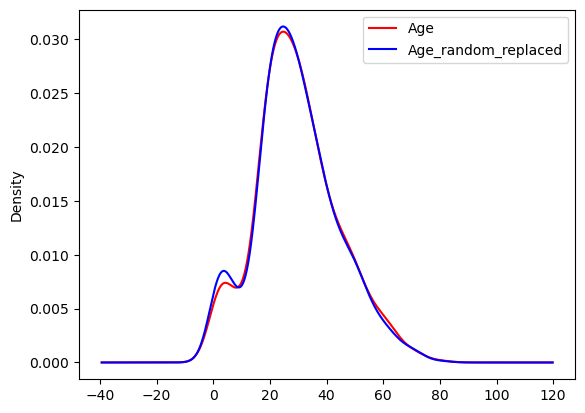

In [78]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax,color='r',legend='Age')
#df['Age_mean_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_mean_replaced')
#df['Age_median_replaced'].plot(kind='kde',ax=ax,color='g',legend='Age_median_replaced')
#df['Age_mode_replaced'].plot(kind='kde',ax=ax,color='m',legend='Age_mode_replaced')
df['Age_random_replaced'].plot(kind='kde',ax=ax,color='b',legend='Age_random_replaced')
plt.legend(loc=1)
plt.show()